# Introduction to Machine Learning - PROJECT

Authors: Aino Liukkonen and Raúl Cruz-Oliver

In [131]:
import pandas as pd
# Documentation
# https://pandas.pydata.org/docs

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn import model_selection

In [134]:
# Our respective DATA folder paths
# Not 100 % sure if yours works or if because of the whitespace characters you need to do some tricks with the path part "Introduction to Machine Learning"
# data_folder = r'C:\Users\lenovo\Desktop\S7-DE\Introduction to Machine Learning\machine_learning_project\DATA'
data_folder = r'C:\Users\ainol\OneDrive\Tiedostot\TutaJaOhtu\Machine_Learning\course_project\DATA'

# Import Data
test = pd.read_excel(data_folder + r'\test.xlsx')
#this is only my path, add yours as a comment

print(test)

    Age  Children
0     5         0
1    25         0
2    55         1
3    35         1
4    12         0
5    75         1
6    65         1
7    21         0
8    92         1
9    37         1
10   49         1
11    9         0
12   27         0
13   68         1
14   38         1
15   57         1
16   56         1
17   23         0
18   18         0


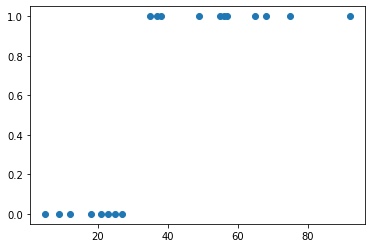

In [112]:
# Data visualization
# from data to vector
x = test["Age"].to_numpy()
y = test["Children"].to_numpy()

plt.scatter(x, y)

In [113]:
k = 1   #number of predictors, remember theta_0 is for the bias since x_o is always 1

sh=np.shape(x)
m=sh[0] #number of observations in the training data

x=np.reshape(x, (m,1)) #predictors
y=np.reshape(y, (m,1)) #labels
ones = np.ones ((m,1)) #for the bias x_0

X = np.concatenate((ones,x),axis=1) #matrix of training data

theta = np.random.rand(k+1,1)

#print(theta)
#print(X)

In [114]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

epsilon=1.0E-03
alpha=0.1
diff=epsilon+1
theta_old=theta

while diff > epsilon:
    theta_old=theta
    error=sigmoid(np.dot(X,theta))-y
    theta = theta_old - (alpha/m)*np.dot(np.transpose(X),error)
    diff = np.linalg.norm(theta_old-theta)
    
#print(error)
print(diff)
print(theta)

0.000969467840317759
[[-14.63266634]
 [  0.47859518]]


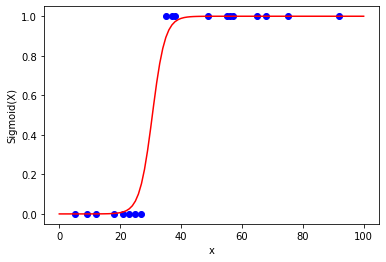

In [115]:
#trained model visualization
x_graph = np.linspace(0, 100, 101)
x_graph=np.reshape(x_graph, (101,1)) #predictors
ones = np.ones ((101,1)) #for the bias x_0
X_graph = np.concatenate((ones,x_graph),axis=1) #matrix of training data

z_graph = sigmoid(np.dot(X_graph,theta))

plt.plot(x_graph, z_graph, c="red")
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
x = test["Age"].to_numpy()
y = test["Children"].to_numpy()
plt.scatter(x, y, c="blue")

In [143]:
# Read data from LOSS.mat
mat_loss = loadmat(data_folder + r'\LOSS.mat')
loss_matrix = mat_loss['LOSS']
loss_matrix = np.matrix(loss_matrix)
# Convert into a Pandas Data Frame
loss = pd.DataFrame(loss_matrix, columns=['NOI', 'DSCR', 'LTV', 'Balance', 
                                        'Rate', 'Fee','Net_Mortgage_Rate', 'Year_Built', 
                                        'Renovation','Occupancy', 'ZipPop', 'CR', 'CS', 
                                        'CS_Ratio','NOI_Ratio', 'PV_Ratio', 'IR'])

# Read data from PAY.mat
mat_pay = loadmat(data_folder + r'\PAY.mat')
pay_matrix = mat_pay['PAY']
pay_matrix = np.matrix(pay_matrix)
# Convert into a Pandas Data Frame
pay = pd.DataFrame(pay_matrix, columns=['NOI', 'DSCR', 'LTV', 'Balance', 
                                        'Rate', 'Fee','Net_Mortgage_Rate', 'Year_Built', 
                                        'Renovation','Occupancy', 'ZipPop', 'CR', 'CS', 
                                        'CS_Ratio','NOI_Ratio', 'PV_Ratio', 'IR'])

# Adding a column to the DataFrames; the value of the column represents whether
# the mortgage has been payed back or defaulted
# Feel free to give the column a better name, I'm not feeling inspired
loss['is_paid'] = 0
pay['is_paid'] = 1

# Concatenate pay and loss data into one DataFrame
data_frames = [pay, loss]
pay_loss = pd.concat(data_frames)
#print(pay_loss)

In [144]:
# Split data into training and validation sets
# Training data 70 %, validation data 30 %
train_data, validation_data = model_selection.train_test_split(pay_loss, test_size=0.3)

Different predictors can be chosen by the name of the column, e.g.<br/>
pay_loss['NOI']<br/>
pay_loss['Balance']

And default/pay (represented by 0/1)<br/>
pay_loss['is_payed']

In [159]:
# Just a little demonstration at this point (using Naive Bayes Model) (Sorry for the ugly code)
# I think we can reshape the data in this manner to fit the models
from sklearn import naive_bayes

naive = naive_bayes.MultinomialNB()
train_x, train_y, valid_x, valid_y = train_data['NOI'].array, train_data['is_paid'].array, validation_data['NOI'].array, validation_data['is_paid'].array
train_x = train_x.reshape(-1, 1)    # <------ The key part; reshaping our 1D data into 2D so for the model
valid_x = valid_x.reshape(-1, 1)    # Not sure if (-1, 1) are the correct numbers; will need to research that a bit
naive.fit(train_x, train_y)

predict_naive = naive.predict(valid_x)